In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Bone Tumor Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv("/content/Bone Tumor Dataset.csv")
df.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy


In [ ]:
df.isna().sum()

Patient ID              0
Sex                     0
Age                     0
Grade                   0
Histological type       0
MSKCC type              0
Site of primary STS     0
Status (NED, AWD, D)    0
Treatment               0
dtype: int64

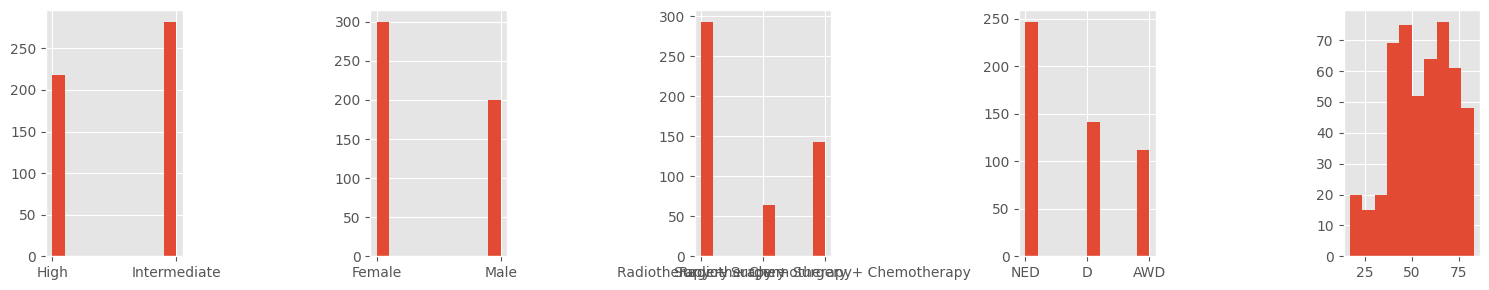

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 5, figsize=(15,3))
ax[0].hist(df.Grade)
ax[1].hist(df.Sex)
ax[2].hist(df.Treatment)
ax[3].hist(df["Status (NED, AWD, D)"])
ax[4].hist(df.Age)
plt.tight_layout()
plt.show()

In [ ]:
new_df = df[["Patient ID", "Age"]]
categorical = df.columns.drop(["Patient ID", "Age"])
for i in range(len(categorical)):
    new_df = new_df.join(pd.get_dummies(df[categorical[i]]).astype(int))

new_df.head()

,Patient ID,Age,Female,Male,High,Intermediate,epithelioid sarcoma,leiomyosarcoma,malignant solitary fibrous tumor,myxofibrosarcoma,...,parascapusular,right buttock,right parascapusular,right thigh,AWD,D,NED,Radiotherapy + Surgery,Radiotherapy + Surgery + Chemotherapy,Surgery + Chemotherapy
0,STS_001,63,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,STS_002,54,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,STS_003,22,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,STS_004,54,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,STS_005,63,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df["Age"] = scaler.fit_transform(new_df[["Age"]])

In [ ]:
x = new_df.drop(columns=["Patient ID", "AWD", "D", "NED"])
y = new_df[["AWD", "D", "NED"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2002)

In [ ]:
x_train

,Age,Female,Male,High,Intermediate,epithelioid sarcoma,leiomyosarcoma,malignant solitary fibrous tumor,myxofibrosarcoma,myxoid fibrosarcoma,...,left biceps,left buttock,left thigh,parascapusular,right buttock,right parascapusular,right thigh,Radiotherapy + Surgery,Radiotherapy + Surgery + Chemotherapy,Surgery + Chemotherapy
242,1.278526,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
250,-0.893305,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
429,-0.645096,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
314,1.030317,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
252,-0.583044,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.658003,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
329,-0.645096,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
392,-0.520991,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
402,-0.893305,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(2024)
tf.random.set_seed(2024)

model = Sequential()
model.add(Dense(units=9, input_dim=31, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["Accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
15/15 [==============================] - 2s 47ms/step - loss: 1.0285 - Accuracy: 0.4533 - val_loss: 0.9731 - val_Accuracy: 0.5400
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.9786 - Accuracy: 0.5467 - val_loss: 0.9231 - val_Accuracy: 0.5800
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9384 - Accuracy: 0.5800 - val_loss: 0.8795 - val_Accuracy: 0.6000
Epoch 4/100
15/15 [==============================] - 0s 15ms/step - loss: 0.9034 - Accuracy: 0.6089 - val_loss: 0.8365 - val_Accuracy: 0.6200
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.8738 - Accuracy: 0.6267 - val_loss: 0.7970 - val_Accuracy: 0.6200
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8479 - Accuracy: 0.6511 - val_loss: 0.7677 - val_Accuracy: 0.6400
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8263 - Accuracy: 0.6711 - val_loss: 0.7432 - val_Accuracy: 0.7000
Epoch 8

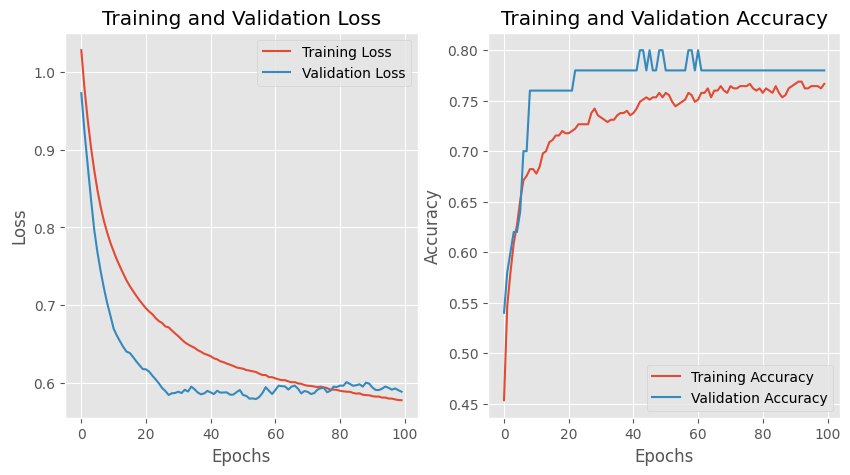

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['Accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_Accuracy'], label='Validation Accuracy')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

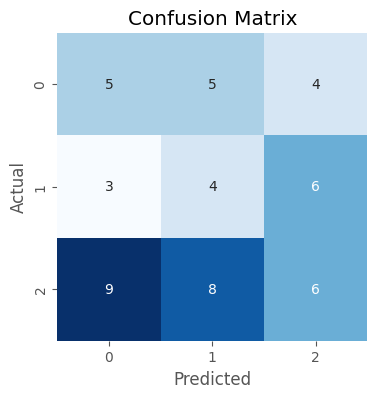

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are correctly defined
# Assuming you have 3 unique classes
num_classes = 3

# Generate dummy data for demonstration
y_test = np.random.randint(0, num_classes, size=(50,))
y_pred = np.random.randint(0, num_classes, size=(50,))

# Apply one-hot encoding to y_test and y_pred
encoder = OneHotEncoder(categories='auto')
y_test_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()
y_pred_onehot = encoder.transform(y_pred.reshape(-1, 1)).toarray()

# Calculate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_onehot, axis=1))

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
